In [25]:
import cv2
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

img = cv2.imread('brain.jpg')
print('Image Dimensions :', img.shape)


Image Dimensions : (2040, 2040, 3)


In [2]:
def initializeCenters(s, n):
  init_centers = []
  l = math.floor(s/2)
  s = math.ceil(s)
  for x in range(l, n, s):
    for y in range(l, n ,s):
      init_centers.append([x,y])
  return init_centers

def computeGradient(img):
  n = img.shape[0]
  x_filter = np.zeros((3,3))
  x_filter[1][0]= -1
  x_filter[1][-1] = 1
  y_filter = np.zeros((3,3))
  y_filter[0][1]= -1
  y_filter[-1][1] = 1
  G = np.zeros((n,n))

  for i in range(3):
    Ix = np.square(signal.convolve2d(img[:,:,i], x_filter, mode='same'))
    Iy = np.square(signal.convolve2d(img[:,:,i], y_filter, mode='same'))
    G += np.sqrt(Ix  +  Iy)
  return G/3


def perturbCenters(G,w,init_centers):
  w_s = range(-math.floor(w//2),math.floor(w//2)+1,1)
  centers = []
  for c in init_centers:
    min = math.inf
    x0 = c[0]
    y0 = c[1]
    for i in w_s:
      for j in w_s:
        if G[x0+i, y0+j]<min:
          min = G[x0+i, y0+j]
          min_x = x0+i
          min_y = y0+j
    centers.append([img[min_x,min_y,0], img[min_x,min_y,1], img[min_x,min_y,2], min_x, min_y])
  return centers


def clusterImg(img, k, m=10, num_iter=2):
  n = img.shape[0]
  s = math.sqrt(n**2/k)

  init_centers = initializeCenters(s, n)
  G = computeGradient(img)
  centers = perturbCenters(G,3,init_centers)
  s = math.ceil(s)
  E = math.inf
  ww = range(-s,s,1)
  img_assign = np.zeros((n,n)).astype(int)
  img_Ds = np.ones((n,n))*math.inf

  for iter in range(num_iter):
    for c in range(len(centers)):
      x0 = round(centers[c][3])
      y0 = round(centers[c][4])
      for i in ww:
        for j in ww:
          if x0+i<n and y0+j<n and x0+i>-1 and y0+j>-1:
            drgb = np.sqrt(np.sum(np.square(img[x0+i,y0+j,:]-img[x0,y0,:])))
            dxy = np.sqrt(i**2+j**2)
            Ds = drgb+m/s*dxy

            if Ds<img_Ds[x0+i,y0+j]:
              img_assign[x0+i,y0+j] = c
              img_Ds[x0+i,y0+j] = Ds
      print(str(c)+"th center search completed!")
    centroid_assign = [[] for i in range(len(centers))]
    for i in range(n):
      for j in range(n):
        centroid_assign[img_assign[i,j]].append([img[i,j,0],img[i,j,1],img[i,j,2],i,j])
    error = 0
    for c in range(len(centers)):
      new_c = np.mean(centroid_assign[c], axis=0)
      error += np.sum(np.abs(new_c - centers[c]))
      centers[c] = new_c
    E = error
    print(E)
    print(str(iter)+"th iteration completed!")
  return img_assign

def addBorder(img, img_assign):
  n = img.shape[0]
  borders = []
  img_b = img
  for x in range(n):
    for y in range(n):
      if x-1>-1 and x+1<n and y-1>-1 and  y+1<n:
          if (img_assign[x-1, y] != img_assign[x+1, y]) or (img_assign[x, y-1] != img_assign[x, y+1]):
            borders.append([x, y])

  for b in borders:
    img_b[b[0], b[1]] = 255
  return img_b



In [3]:
img_assign0 = clusterImg(img, k=64, num_iter=2)

0th center search completed!
1th center search completed!
2th center search completed!
3th center search completed!
4th center search completed!
5th center search completed!
6th center search completed!
7th center search completed!
8th center search completed!
9th center search completed!
10th center search completed!
11th center search completed!
12th center search completed!
13th center search completed!
14th center search completed!
15th center search completed!
16th center search completed!
17th center search completed!
18th center search completed!
19th center search completed!
20th center search completed!
21th center search completed!
22th center search completed!
23th center search completed!
24th center search completed!
25th center search completed!
26th center search completed!
27th center search completed!
28th center search completed!
29th center search completed!
30th center search completed!
31th center search completed!
32th center search completed!
33th center search c

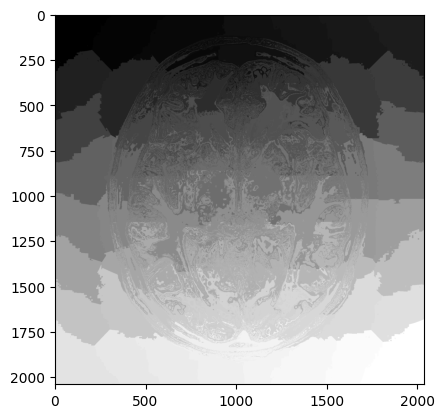

In [4]:
plt.imshow(img_assign0, cmap ='gray')

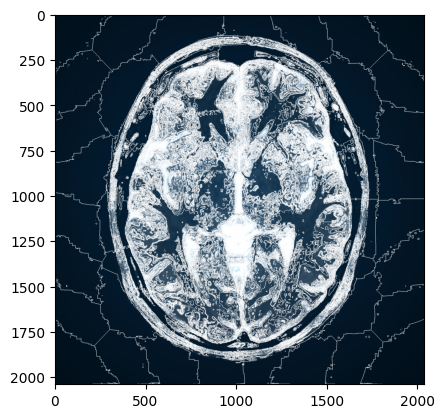

In [22]:
img0 = addBorder(img, img_assign0)
cv2.imwrite('k64_seg_img.jpg',img0 )
plt.imshow(cv2.cvtColor(img0, cv2.COLOR_BGR2RGB))

In [5]:
img_assign1 = clusterImg(img, k=256, num_iter=2)

0th center search completed!
1th center search completed!
2th center search completed!
3th center search completed!
4th center search completed!
5th center search completed!
6th center search completed!
7th center search completed!
8th center search completed!
9th center search completed!
10th center search completed!
11th center search completed!
12th center search completed!
13th center search completed!
14th center search completed!
15th center search completed!
16th center search completed!
17th center search completed!
18th center search completed!
19th center search completed!
20th center search completed!
21th center search completed!
22th center search completed!
23th center search completed!
24th center search completed!
25th center search completed!
26th center search completed!
27th center search completed!
28th center search completed!
29th center search completed!
30th center search completed!
31th center search completed!
32th center search completed!
33th center search c

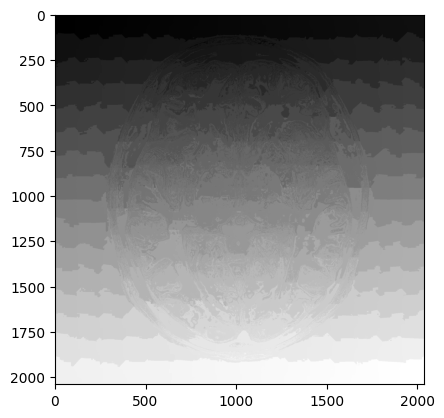

In [6]:
plt.imshow(img_assign1, cmap ='gray')

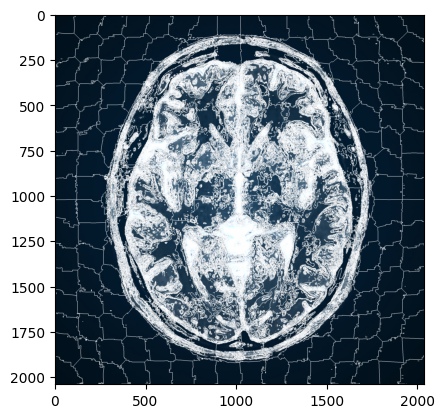

In [24]:
img1 = addBorder(img, img_assign1)
cv2.imwrite('k256_seg_img.jpg',img1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [7]:
img_assign2 = clusterImg(img, k=1024, num_iter=2)

0th center search completed!
1th center search completed!
2th center search completed!
3th center search completed!
4th center search completed!
5th center search completed!
6th center search completed!
7th center search completed!
8th center search completed!
9th center search completed!
10th center search completed!
11th center search completed!
12th center search completed!
13th center search completed!
14th center search completed!
15th center search completed!
16th center search completed!
17th center search completed!
18th center search completed!
19th center search completed!
20th center search completed!
21th center search completed!
22th center search completed!
23th center search completed!
24th center search completed!
25th center search completed!
26th center search completed!
27th center search completed!
28th center search completed!
29th center search completed!
30th center search completed!
31th center search completed!
32th center search completed!
33th center search c

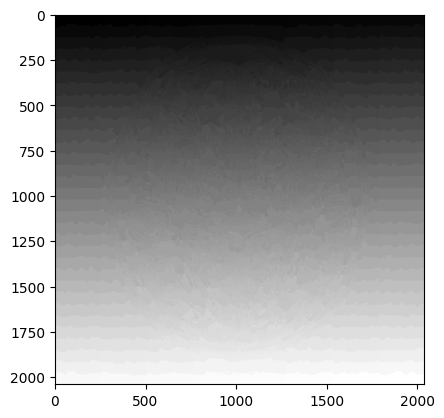

In [8]:
plt.imshow(img_assign2, cmap ='gray')

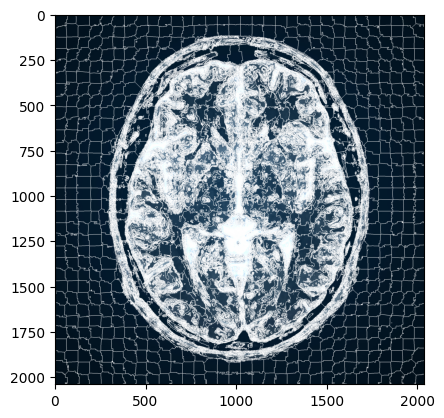

In [26]:
img2 = addBorder(img, img_assign2)
cv2.imwrite('k1024_seg_img.jpg',img2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))